In [1]:
#AI bootcamp #installation of kaggle platform.

!pip install -q kaggle #kaggle is an online platform for ml and data science.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asmitaroy21","key":"f2bcd7941de5724355be9825e6c24552"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf #is a deep learning network used for bulding neural networks, nlp, image recognition etc.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}; Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28); Test shape: (10000, 28, 28)


In [7]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


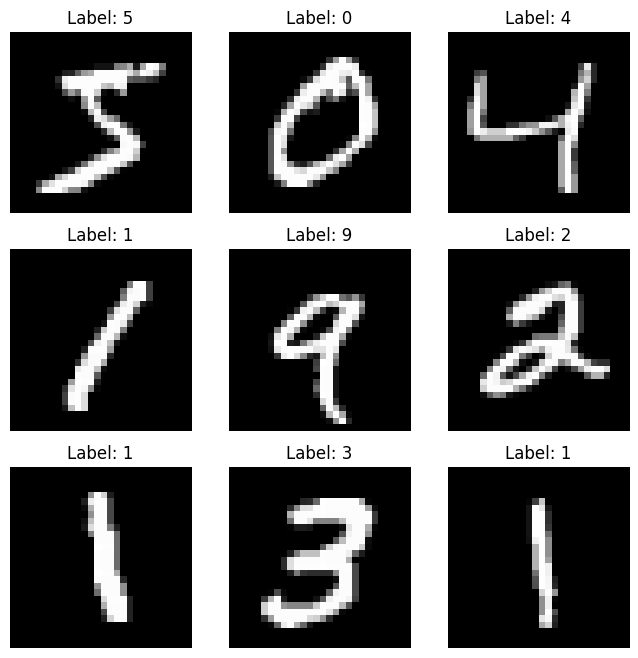

In [8]:
import matplotlib.pyplot as plt #is used to visualize data from 0 1 2 and so on
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

In [9]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/255.0
x_test_c10=x_test_c10/255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}") #cifar-10 dataset is loaded which is used for color images.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [10]:
#we are going to build a cnn model and then we are going to train it.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential(
    [
        Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)), #it helps in learning faster with positive values only.
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(), #to convert 2D into 1D images; first we'll train with 32 patterns then go to 64 patterns.
        Dense(128,activation='relu'),
        Dense(10,activation='softmax') #to turn the outputs into probabilities which output has the highest chance.

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # adam is a type of algorithm that adjusts weights based on your dataset.
model.summary()





/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(x_train,y_train,epochs=6,batch_size=32,validation_split=0.2) #every image will be shown 5 times to the model.

Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.8902 - loss: 0.3444 - val_accuracy: 0.9779 - val_loss: 0.0738
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9843 - loss: 0.0521 - val_accuracy: 0.9830 - val_loss: 0.0565
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9902 - loss: 0.0330 - val_accuracy: 0.9883 - val_loss: 0.0414
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.9873 - val_loss: 0.0444
Epoch 5/6
 530/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9949 - loss: 0.0156

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential(
    [
        Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)), #it helps in learning faster with positive values only.
        MaxPooling2D(2,2),
        Conv2D(64,(3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(), #to convert 2D into 1D images; first we'll train with 32 patterns then go to 64 patterns.
        Dense(128,activation='relu'),
        Dense(10,activation='softmax') #to turn the outputs into probabilities which output has the highest chance.

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #is used for image augmentation and pre-processing before training a model.
datagen = ImageDataGenerator(

    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
#deeper CNN's have more layers; helps them to learn more complex features.
#cnn layer detects features edges and shapes.
#we use pooling to reduce dimensions.
#we use flatten() to convert 2d to 1d images.
#to class out probabalities.(softmax)
#dropout is used for overfitting
#in keras model.fit starts training of model.
# model.evaluate return loss and accuracy.
#validation_split=0.2 means only uses 20% of the data during training.
#Preprocessing is basically executing only pre-research or homework about the topic.
#kaggle api (application programming interface)
#transfer learning (for example teachers are pre trained models they are transfering the past exp data to new models like students) like in ml/dl we transfer data to new models.
#we can deployed it using streamlit part for frontend.
#we used cat and dog dataset, cifar-10 and mnist dataset here.
#roc curve receive operating curve used for showing the performance of binary classification model at different thresholds.




In [ ]:
#for deployment we used streamlit, flask or django
!kaggle datasets download -d tongpython/cat-and-dog

In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

In [ ]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)

roc_auc=auc(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()